# Mini projet - Appstore Games

#### Maxime DUBOST - M1 IoT - 16/11/2020

Imports :

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

data = pd.read_csv('https://raw.githubusercontent.com/MaximeDubost/appstore_games/master/appstore_games.csv')

Colonnes du dataset d'origine :

In [64]:
data.dtypes

URL                              object
ID                                int64
Name                             object
Subtitle                         object
Icon URL                         object
Average User Rating             float64
User Rating Count               float64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                       object
Languages                        object
Size                            float64
Primary Genre                    object
Genres                           object
Original Release Date            object
Current Version Release Date     object
dtype: object

Nombre de colonnes du dataset d'origine :

In [65]:
len(data.columns)

18

Création du dataset de travail :

In [66]:
d = {"ID": "id", "Name": "name", "Average User Rating": "avg_user_rating", "User Rating Count": "user_rating_count", "Price": "price", "Age Rating": "age_rating", "Genres": "genres", "Original Release Date": "original_release_date", "Current Version Release Date": "current_version_release_date"}
df = pd.DataFrame({"ID": data["ID"], "Name": data["Name"], "Average User Rating": data["Average User Rating"], "User Rating Count": data["User Rating Count"], "Price": data["Price"], "Age Rating": data["Age Rating"], "Genres": data["Genres"], "Original Release Date": data["Original Release Date"], "Current Version Release Date": data["Current Version Release Date"]}).rename(columns=d)
df['original_release_year'] = pd.DatetimeIndex(df['original_release_date']).year
df['current_version_release_year'] = pd.DatetimeIndex(df['current_version_release_date']).year

Colonnes du dataset de travail :

In [67]:
df.dtypes

id                                int64
name                             object
avg_user_rating                 float64
user_rating_count               float64
price                           float64
age_rating                       object
genres                           object
original_release_date            object
current_version_release_date     object
original_release_year             int64
current_version_release_year      int64
dtype: object

Nombre de colonnes du dataset de travail :

In [77]:
len(df.columns)

11

Apperçu du dataset de travail :

In [68]:
df.head()

,id,name,avg_user_rating,user_rating_count,price,age_rating,genres,original_release_date,current_version_release_date,original_release_year,current_version_release_year
0,284921427,Sudoku,4.0,3553.0,2.99,4+,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,2008,2017
1,284926400,Reversi,3.5,284.0,1.99,4+,"Games, Strategy, Board",11/07/2008,17/05/2018,2008,2018
2,284946595,Morocco,3.0,8376.0,0.00,4+,"Games, Board, Strategy",11/07/2008,5/09/2017,2008,2017
3,285755462,Sudoku (Free),3.5,190394.0,0.00,4+,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,2008,2017
4,285831220,Senet Deluxe,3.5,28.0,2.99,4+,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,2008,2018


## Partie 1 : Analyse graphique des données (Dataviz)

- Diagrammes de répartition des données (type gaussienne sur les données)

In [73]:
std = np.std(df.avg_user_rating, ddof=1)
mean = np.mean(df.avg_user_rating)

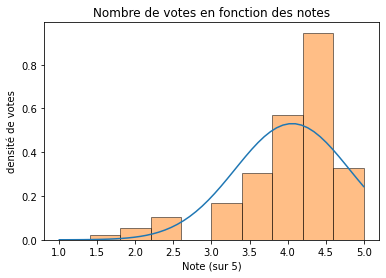

In [94]:
domain = np.linspace(np.min(df.avg_user_rating), np.max(df.avg_user_rating))
plt.plot(domain, norm.pdf(domain, mean, std))
plt.hist(df.avg_user_rating, edgecolor = 'black', alpha = 0.5, density = True)
plt.title('Nombre de votes en fonction des notes')
plt.xlabel('Note (sur 5)')
plt.ylabel('densité de votes')
plt.show()